#GDD Data Extraction and Cleaning

In this project, we have undertaken a comprehensive analysis of dietary factors across 185 countries. The dataset is derived from various CSV files, each representing dietary intake information for different dietary factors. Our aim is to extract meaningful insights from this data after thorough cleaning and processing.

1. Data Collection and Cleaning:

    The dataset comprises multiple CSV files, each focusing on specific dietary factors. We have meticulously gathered and combined data from these files to create a unified dataset for analysis.

    The initial phase of the project involved extensive data cleaning procedures. This included handling missing values, removing duplicates, and ensuring consistency across variables. Additionally, we filtered the dataset to include only individuals up to the age of 5, as our primary focus is on early childhood nutrition.

2. Data Analysis and Aggregation:

    Once the data was cleaned, we proceeded with the analysis of dietary factors. We calculated key metrics such as mean intake for each dietary factor across different countries and years. This aggregation process provided us with valuable insights into dietary trends and patterns.

3. Global Analysis:

    To provide a comprehensive global analysis, we incorporated continent information for each country. This enabled us to explore dietary variations across different regions of the world.

4. Visualization:

    Visualization played a crucial role in our analysis. We utilized interactive line plots to illustrate trends in dietary intake over time for each dietary factor. Furthermore, we generated global maps to visualize the distribution of dietary intake across continents.

# Block 1: Importing Libraries and Setting Up

In [ ]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objs as go
import mysql

In [ ]:
region_mapping = {"Afghanistan":"Asia","Angola":"Africa","Albania":"Europe","Andorra":"Europe","United Arab Emirates":"Asia","Argentina":"America","Armenia":"Asia","Antigua and Barbuda":"America","Australia":"Oceania","Austria":"Europe","Azerbaijan":"Asia","Burundi":"Africa","Belgium":"Europe","Benin":"Africa","Burkina Faso":"Africa","Bangladesh":"Asia","Bulgaria":"Europe","Bahrain":"Asia","The Bahamas":"America","Bosnia and Herzegovina":"Europe","Belarus":"Europe","Belize":"America","Bolivia":"America","Brazil":"America","Barbados":"America","Brunei":"Asia","Bhutan":"Asia","Botswana":"Africa","Central African Republic":"Africa","Canada":"America","Switzerland":"Europe","Chile":"America","China":"Asia","Cote dIvoire":"Africa","Cameroon":"Africa","Democratic Republic of the Congo":"Africa","Congo":"Africa","Colombia":"America","Comoros":"Africa","Cape Verde":"Africa","Costa Rica":"America","Cuba":"America","Cyprus":"Europe","Czech Republic":"Europe","Germany":"Europe","Djibouti":"Africa","Dominica":"America","Denmark":"Europe","Dominican Republic":"America","Algeria":"Africa","Ecuador":"America","Egypt":"Africa","Eritrea":"Africa","Spain":"Europe","Estonia":"Europe","Ethiopia":"Africa","Finland":"Europe","Fiji":"Oceania","France":"Europe","Federated States of Micronesia":"Oceania","Gabon":"Africa","United Kingdom":"Europe","Georgia":"Asia","Ghana":"Africa","Guinea":"Africa","The Gambia":"Africa","Guinea-Bissau":"Africa","Equatorial Guinea":"Africa","Greece":"Europe","Grenada":"America","Guatemala":"America","Guyana":"America","Honduras":"America","Croatia":"Europe","Haiti":"America","Hungary":"Europe","Indonesia":"Asia","India":"Asia","Ireland":"Europe","Iran":"Asia","Iraq":"Asia","Iceland":"Europe","Israel":"Asia","Italy":"Europe","Jamaica":"America","Jordan":"Asia","Japan":"Asia","Kazakhstan":"Asia","Kenya":"Africa","Kyrgyzstan":"Asia","Cambodia":"Asia","Kiribati":"Oceania","South Korea":"Asia","Kuwait":"Asia","Laos":"Asia","Lebanon":"Asia","Liberia":"Africa","Libya":"Africa","Saint Lucia":"America","Sri Lanka":"Asia","Lesotho":"Africa","Lithuania":"Europe","Luxembourg":"Europe","Latvia":"Europe","Morocco":"Africa","Moldova":"Europe","Madagascar":"Africa","Maldives":"Asia","Mexico":"America","Marshall Islands":"Oceania","Macedonia":"Europe","Mali":"Africa","Malta":"Europe","Myanmar":"Asia","Montenegro":"Europe","Mongolia":"Asia","Mozambique":"Africa","Mauritania":"Africa","Mauritius":"Africa","Malawi":"Africa","Malaysia":"Asia","Namibia":"Africa","Niger":"Africa","Nigeria":"Africa","Nicaragua":"America","Netherlands":"Europe","Norway":"Europe","Nepal":"Asia","New Zealand":"Oceania","Oman":"Asia","Pakistan":"Asia","Panama":"America","Peru":"America","Philippines":"Asia","Papua New Guinea":"Oceania","Poland":"Europe","North Korea":"Asia","Portugal":"Europe","Paraguay":"America","Palestine":"Asia","Qatar":"Asia","Romania":"Europe","Russia":"Europe","Rwanda":"Africa","Saudi Arabia":"Asia","Sudan":"Africa","Senegal":"Africa","Singapore":"Asia","Solomon Islands":"Oceania","Sierra Leone":"Africa","El Salvador":"America","Somalia":"Africa","Serbia":"Europe","Sao Tome and Principe":"Africa","Suriname":"America","Slovakia":"Europe","Slovenia":"Europe","Sweden":"Europe","Swaziland":"Africa","Seychelles":"Africa","Syria":"Asia","Chad":"Africa","Togo":"Africa","Thailand":"Asia","Tajikistan":"Asia","Turkmenistan":"Asia","Timor-Leste":"Asia","Tonga":"Oceania","Trinidad and Tobago":"America","Tunisia":"Africa","Turkey":"Asia","Taiwan":"Asia","Tanzania":"Africa","Uganda":"Africa","Ukraine":"Europe","Uruguay":"America","United States":"America","Uzbekistan":"Asia","Saint Vincent and the Grenadines":"America","Venezuela":"America","Vietnam":"Asia","Vanuatu":"Oceania","Samoa":"Oceania","Yemen":"Asia","South Africa":"Africa","Zambia":"Africa","Zimbabwe":"Africa"}

country_code_mapping = {"AFG":"Afghanistan","AGO":"Angola","ALB":"Albania","AND":"Andorra","ARE":"United Arab Emirates","ARG":"Argentina","ARM":"Armenia","ATG":"Antigua and Barbuda","AUS":"Australia","AUT":"Austria","AZE":"Azerbaijan","BDI":"Burundi","BEL":"Belgium","BEN":"Benin","BFA":"Burkina Faso","BGD":"Bangladesh","BGR":"Bulgaria","BHR":"Bahrain","BHS":"The Bahamas","BIH":"Bosnia and Herzegovina","BLR":"Belarus","BLZ":"Belize","BOL":"Bolivia","BRA":"Brazil","BRB":"Barbados","BRN":"Brunei","BTN":"Bhutan","BWA":"Botswana","CAF":"Central African Republic","CAN":"Canada","CHE":"Switzerland","CHL":"Chile","CHN":"China","CIV":"Cote dIvoire","CMR":"Cameroon","COD":"Democratic Republic of the Congo","COG":"Congo","COL":"Colombia","COM":"Comoros","CPV":"Cape Verde","CRI":"Costa Rica","CUB":"Cuba","CYP":"Cyprus","CZE":"Czech Republic","DEU":"Germany","DJI":"Djibouti","DMA":"Dominica","DNK":"Denmark","DOM":"Dominican Republic","DZA":"Algeria","ECU":"Ecuador","EGY":"Egypt","ERI":"Eritrea","ESP":"Spain","EST":"Estonia","ETH":"Ethiopia","FIN":"Finland","FJI":"Fiji","FRA":"France","FSM":"Federated States of Micronesia","GAB":"Gabon","GBR":"United Kingdom","GEO":"Georgia","GHA":"Ghana","GIN":"Guinea","GMB":"The Gambia","GNB":"Guinea-Bissau","GNQ":"Equatorial Guinea","GRC":"Greece","GRD":"Grenada","GTM":"Guatemala","GUY":"Guyana","HND":"Honduras","HRV":"Croatia","HTI":"Haiti","HUN":"Hungary","IDN":"Indonesia","IND":"India","IRL":"Ireland","IRN":"Iran","IRQ":"Iraq","ISL":"Iceland","ISR":"Israel","ITA":"Italy","JAM":"Jamaica","JOR":"Jordan","JPN":"Japan","KAZ":"Kazakhstan","KEN":"Kenya","KGZ":"Kyrgyzstan","KHM":"Cambodia","KIR":"Kiribati","KOR":"South Korea","KWT":"Kuwait","LAO":"Laos","LBN":"Lebanon","LBR":"Liberia","LBY":"Libya","LCA":"Saint Lucia","LKA":"Sri Lanka","LSO":"Lesotho","LTU":"Lithuania","LUX":"Luxembourg","LVA":"Latvia","MAR":"Morocco","MDA":"Moldova","MDG":"Madagascar","MDV":"Maldives","MEX":"Mexico","MHL":"Marshall Islands","MKD":"Macedonia","MLI":"Mali","MLT":"Malta","MMR":"Myanmar","MNE":"Montenegro","MNG":"Mongolia","MOZ":"Mozambique","MRT":"Mauritania","MUS":"Mauritius","MWI":"Malawi","MYS":"Malaysia","NAM":"Namibia","NER":"Niger","NGA":"Nigeria","NIC":"Nicaragua","NLD":"Netherlands","NOR":"Norway","NPL":"Nepal","NZL":"New Zealand","OMN":"Oman","PAK":"Pakistan","PAN":"Panama","PER":"Peru","PHL":"Philippines","PNG":"Papua New Guinea","POL":"Poland","PRK":"North Korea","PRT":"Portugal","PRY":"Paraguay","PSE":"Palestine","QAT":"Qatar","ROU":"Romania","RUS":"Russia","RWA":"Rwanda","SAU":"Saudi Arabia","SDN":"Sudan","SEN":"Senegal","SGP":"Singapore","SLB":"Solomon Islands","SLE":"Sierra Leone","SLV":"El Salvador","SOM":"Somalia","SRB":"Serbia","STP":"Sao Tome and Principe","SUR":"Suriname","SVK":"Slovakia","SVN":"Slovenia","SWE":"Sweden","SWZ":"Swaziland","SYC":"Seychelles","SYR":"Syria","TCD":"Chad","TGO":"Togo","THA":"Thailand","TJK":"Tajikistan","TKM":"Turkmenistan","TLS":"Timor-Leste","TON":"Tonga","TTO":"Trinidad and Tobago","TUN":"Tunisia","TUR":"Turkey","TWN":"Taiwan","TZA":"Tanzania","UGA":"Uganda","UKR":"Ukraine","URY":"Uruguay","USA":"United States","UZB":"Uzbekistan","VCT":"Saint Vincent and the Grenadines","VEN":"Venezuela","VNM":"Vietnam","VUT":"Vanuatu","WSM":"Samoa","YEM":"Yemen","ZAF":"South Africa","ZMB":"Zambia","ZWE":"Zimbabwe"}

variable_labels = {"v01":"Fruits","v02":"Non-starchy vegetables","v03":"Potatoes","v04":"Other starchy vegetables","v05":"Beans and legumes","v06":"Nuts and seeds","v07":"Refined grains","v08":"Whole grains","v09":"Total processed meats","v10":"Unprocessed red meats","v11":"Total seafoods","v12":"Eggs","v13":"Cheese","v14":"Yoghurt (including fermented milk)","v15":"Sugar-sweetened beverages","v16":"Fruit juices","v17":"Coffee","v18":"Tea","v22":"Total carbohydrates","v23":"Total protein","v27":"Saturated fat","v28":"Monounsaturated fatty acids","v29":"Total omega-6 fat","v30":"Seafood omega-3 fat","v31":"Plant omega-3 fat","v33":"Dietary cholesterol","v34":"Dietary fiber","v35":"Added sugars","v36":"Calcium","v37":"Dietary sodium","v38":"Iodine","v39":"Iron","v40":"Magnesium","v41":"Potassium","v42":"Selenium","v43":"Vitamin A w/ supplements","v45":"Vitamin B1","v46":"Vitamin B2","v47":"Vitamin B3","v48":"Vitamin B6","v49":"Vitamin B9 (Folate)","v50":"Vitamin B12","v51":"Vitamin C","v52":"Vitamin D","v53":"Vitamin E","v54":"Zinc","v57":"Total Milk"}

gdd_variables = {"Added sugars": "% of total kcal per day (energy contribution)","Beans and legumes": "grams per day","Calcium": "milligrams (mg) per day","Cheese": "grams per day","Coffee": "cups/day (1 cup=8 oz)","Dietary cholesterol": "milligrams (mg) per day","Dietary fiber": "grams per day","Dietary sodium": "milligrams (mg) per day","Eggs": "grams per day","Fruit juices": "grams per day","Fruits": "grams per day","Iodine": "micrograms (µg) per day","Iron": "milligrams (mg) per day","Magnesium": "milligrams (mg) per day","Monounsaturated fat": "% of total kcal per day (energy contribution)","Non-starchy vegetables": "grams per day","Nuts and seeds": "grams per day","Other starchy vegetables": "grams per day","Plant omega-3 (n-3) fat": "milligrams (mg) per day","Plant protein": "grams per day","Potassium": "milligrams (mg) per day","Potatoes": "grams per day","Reduced fat milk": "grams per day","Refined grains": "grams per day","Saturated fat": "% of total kcal per day (energy contribution)","Seafood omega-3 (n-3) fat": "milligrams (mg) per day","Selenium": "micrograms (µg) per day","Sugar-sweetened beverages": "grams per day","Tea": "cups/day (1 cup=8 oz)","Total animal protein": "grams per day","Total carbohydrates": "% of total kcal per day (energy contribution)","Total energy": "kcal per day","Total Milk": "grams per day","Total omega-6 fatty acids": "% of total kcal per day (energy contribution)","Total processed meats": "grams per day","Total protein": "grams per day","Total seafoods": "grams per day","Unprocessed red meats": "grams per day","Vitamin A with supplements": "μg RAE/day (RAE=retinol activity equivalent)","Vitamin A without supplements": "μg RAE/day (RAE=retinol activity equivalent)","Vitamin B1": "milligrams (mg) per day","Vitamin B12": "micrograms (µg) per day","Vitamin B2": "milligrams (mg) per day","Vitamin B3": "milligrams (mg) per day","Vitamin B6": "milligrams (mg) per day","Vitamin B9 (Folate)": "micrograms (µg) per day DFE","Vitamin C": "milligrams (mg) per day","Vitamin D": "micrograms (µg) per day","Vitamin E": "milligrams (mg) per day","Whole fat milk": "grams per day","Whole grains": "grams per day","Yoghurt (including fermented milk)": "grams per day","Zinc": "milligrams (mg) per day"}

# Block 2: Data Processing Functions

- Defining functions for data processing tasks such as combining CSV files, filtering data, and plotting graphs.
- Combining multiple CSV files containing dietary data across various countries.
Filtering the data based on specific criteria such as age, urban status, and education.
- Adding geographical mapping information and GDD variable labels.
- Cleaning the data by dropping missing values and duplicates.
  

In [ ]:
def combine_csv_files(csv_files):

  all_df = []

  for csv_file in csv_files:

    df = pd.read_csv(csv_file)

    df = df[(df['age'] <= 2.5) & (df['urban'] == 999) & (df['edu'] == 999)]

    df_grouped = df.groupby(['iso3', 'year', 'female']).median(numeric_only=True)
    df_grouped = df_grouped.reset_index()
    df_grouped['age'] = 5

    df = df_grouped

    df['iso'] = df['iso3']
    df = df.rename(columns={'iso3': 'country_code'})

    df['country name'] = df['country_code'].map(country_code_mapping)
    df = df.drop('country_code', axis=1)
    df['region'] = df['country name'].map(region_mapping)
    df = df[df['region'] != 'Oceania']
    df = df.dropna()

    df = df[['female', 'year', 'median', 'country name', 'iso', 'region']]

    nuti_name = csv_file.split('_')[0].split('/')[-1]

    # Add a column for the GDD Variable Label
    gdd_variable = variable_labels.get(nuti_name, 'Unknown')

    df['GDD Variable Label'] = gdd_variable

    df['Proportion'] = gdd_variables.get(gdd_variable, 'Unknown')

    all_df.append(df)

  combined_df = pd.concat(all_df)

  # Return the combined DataFrame.
  return combined_df

file_paths = [
    f'/content/drive/MyDrive/Colab Notebooks/Country-level estimates/v{i:02d}_cnty.csv'
    for i in range(1, 58)  # Assuming files are named v01_cnty.csv, v02_cnty.csv, ..., v57_cnty.csv
    if os.path.exists(f'/content/drive/MyDrive/Colab Notebooks/Country-level estimates/v{i:02d}_cnty.csv')
]

data = combine_csv_files(file_paths)

# Block 3: Exploratory Data Analysis (EDA)
- Conducting exploratory data analysis tasks such as checking unique labels, dropping missing values, and duplicates.
- Plotting graphs to visualize dietary intake trends for specific countries and dietary factors.

In [ ]:
data.head()

,female,year,median,country name,iso,region,GDD Variable Label,Proportion
0,0,1990,18.837966,Afghanistan,AFG,Asia,Fruits,grams per day
1,1,1990,19.747563,Afghanistan,AFG,Asia,Fruits,grams per day
2,999,1990,19.594409,Afghanistan,AFG,Asia,Fruits,grams per day
3,0,1995,15.037755,Afghanistan,AFG,Asia,Fruits,grams per day
4,1,1995,15.618902,Afghanistan,AFG,Asia,Fruits,grams per day


Total Label presents

In [ ]:
data = data.rename(columns={
    'female': 'Sex',
    'year': 'Year',
    'median': 'Mean',
    'country name': 'Country Name',
    'iso': 'ISO',
    'region': 'Continent',
    'GDD Variable Label': 'Nutrition',
    'Proportion': 'Proportion'
})

In [ ]:
data['Nutrition'].unique()

array(['Fruits', 'Non-starchy vegetables', 'Potatoes',
       'Other starchy vegetables', 'Beans and legumes', 'Nuts and seeds',
       'Refined grains', 'Whole grains', 'Total processed meats',
       'Unprocessed red meats', 'Total seafoods', 'Eggs', 'Cheese',
       'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages',
       'Fruit juices', 'Coffee', 'Tea', 'Total carbohydrates',
       'Total protein', 'Saturated fat', 'Monounsaturated fatty acids',
       'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat',
       'Dietary cholesterol', 'Dietary fiber', 'Added sugars', 'Calcium',
       'Dietary sodium', 'Iodine', 'Iron', 'Magnesium', 'Potassium',
       'Selenium', 'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2',
       'Vitamin B3', 'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12',
       'Vitamin C', 'Vitamin D', 'Vitamin E', 'Zinc', 'Total Milk'],
      dtype=object)

In [ ]:
data['Proportion'].unique()

array(['grams per day', 'cups/day (1 cup=8 oz)',
       '% of total kcal per day (energy contribution)', None,
       'milligrams (mg) per day', 'micrograms (µg) per day',
       'micrograms (µg) per day DFE'], dtype=object)

In [ ]:
data.dropna()

,Sex,Year,Mean,Country Name,ISO,Continent,Nutrition,Proportion
0,0,1990,18.837966,Afghanistan,AFG,Asia,Fruits,grams per day
1,1,1990,19.747563,Afghanistan,AFG,Asia,Fruits,grams per day
2,999,1990,19.594409,Afghanistan,AFG,Asia,Fruits,grams per day
3,0,1995,15.037755,Afghanistan,AFG,Asia,Fruits,grams per day
4,1,1995,15.618902,Afghanistan,AFG,Asia,Fruits,grams per day
...,...,...,...,...,...,...,...,...
3880,1,2015,39.510428,Zimbabwe,ZWE,Africa,Total Milk,grams per day
3881,999,2015,39.561560,Zimbabwe,ZWE,Africa,Total Milk,grams per day
3882,0,2018,39.045241,Zimbabwe,ZWE,Africa,Total Milk,grams per day
3883,1,2018,39.045869,Zimbabwe,ZWE,Africa,Total Milk,grams per day


In [ ]:
data.drop_duplicates()

,Sex,Year,Mean,Country Name,ISO,Continent,Nutrition,Proportion
0,0,1990,18.837966,Afghanistan,AFG,Asia,Fruits,grams per day
1,1,1990,19.747563,Afghanistan,AFG,Asia,Fruits,grams per day
2,999,1990,19.594409,Afghanistan,AFG,Asia,Fruits,grams per day
3,0,1995,15.037755,Afghanistan,AFG,Asia,Fruits,grams per day
4,1,1995,15.618902,Afghanistan,AFG,Asia,Fruits,grams per day
...,...,...,...,...,...,...,...,...
3880,1,2015,39.510428,Zimbabwe,ZWE,Africa,Total Milk,grams per day
3881,999,2015,39.561560,Zimbabwe,ZWE,Africa,Total Milk,grams per day
3882,0,2018,39.045241,Zimbabwe,ZWE,Africa,Total Milk,grams per day
3883,1,2018,39.045869,Zimbabwe,ZWE,Africa,Total Milk,grams per day


In [ ]:
filtered_data_all_genders = data[(data['ISO'] == 'AFG') & (data['Nutrition'] == 'Eggs') & (data['Sex'] == 999)]

In [ ]:
filtered_data_all_genders.head()

,Sex,Year,Mean,Country Name,ISO,Continent,Nutrition,Proportion
2,999,1990,2.838626,Afghanistan,AFG,Asia,Eggs,grams per day
5,999,1995,1.721346,Afghanistan,AFG,Asia,Eggs,grams per day
8,999,2000,1.548404,Afghanistan,AFG,Asia,Eggs,grams per day
11,999,2005,2.061655,Afghanistan,AFG,Asia,Eggs,grams per day
14,999,2010,2.669631,Afghanistan,AFG,Asia,Eggs,grams per day


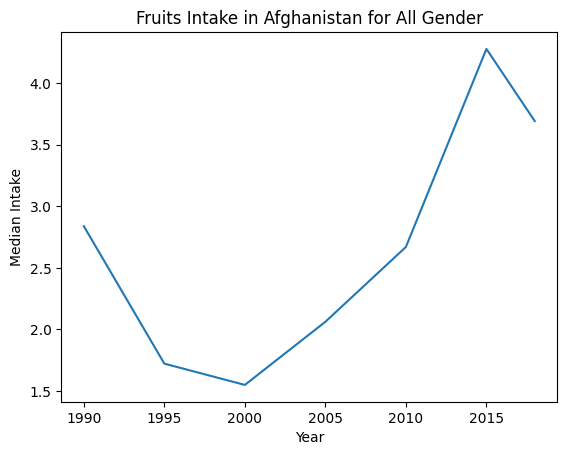

In [ ]:
import matplotlib.pyplot as plt

# Plot the graph
plt.plot(filtered_data_all_genders['Year'], filtered_data_all_genders['Mean'])
plt.xlabel('Year')
plt.ylabel('Median Intake')
plt.title('Fruits Intake in Afghanistan for All Gender')
plt.show()

In [ ]:
filtered_data_all_genders = data[(data['Sex'] == 999) & (data['Nutrition'] == 'Eggs')]

filtered_data_all_genders.describe()

,Sex,Year,Mean
count,1211.0,1211.000000,1211.000000
mean,999.0,2004.714286,6.708709
std,0.0,9.591368,4.760470
min,999.0,1990.000000,0.251661
25%,999.0,1995.000000,3.255981
50%,999.0,2005.000000,5.519877
75%,999.0,2015.000000,9.215232
max,999.0,2018.000000,42.228171


# Block 4: Visualization Functions

### Visualizing Dietary Intake on Choropleth Map

The `plot_choropleth` function creates an interactive choropleth map depicting the median intake of a specific dietary factor across different countries over time. Given a DataFrame containing dietary data and a GDD Variable Label representing the dietary factor of interest, the function filters the data accordingly and generates the map using Plotly Express. Each country is represented by a colored region, with the color intensity indicating the median intake level. Users can interactively explore the map to observe how dietary intake patterns evolve over the specified time period.

In [ ]:
def plot_choropleth(data, gdd_variable_label):
    # Filter data for the specified GDD Variable Label and all genders
    filtered_data = data[(data['Sex'] == 999) & (data['Nutrition'] == gdd_variable_label)]

    # Create the choropleth map
    fig = px.choropleth(filtered_data, locations='ISO', color='Mean',
                        hover_name='Country Name', animation_frame='Year',
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title=f'Median Intake of {gdd_variable_label} by Country Over the Years')

    # Update layout to hide frame and coastlines
    fig.update_layout(geo=dict(showframe=False, showcoastlines=False))

    # Show the figure
    fig.show()

In [ ]:
plot_choropleth(data, 'Eggs')

### Analyzing Dietary Changes

The `plot_dietary_changes` function analyzes changes in dietary intake for a specific country over a given time frame. It filters data based on specified criteria, calculates the change in median intake for each dietary factor, and visualizes the results using a bar graph. The graph provides insights into how dietary habits have evolved over the selected period for the chosen country.

In [ ]:
def plot_dietary_changes(data, start_year, end_year, country):
    # Filter data for the specified range of years and country
    filtered_data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year) & (data['Country Name'] == country) & (data['Sex'] == 999)]

    # Group by country and GDD Variable Label, and calculate the change in median intake
    grouped_data = filtered_data.groupby(['Country Name', 'Nutrition'])['Mean'].agg(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()

    # Pivot the table to have GDD Variable Labels as columns
    pivot_table = grouped_data.pivot(index='Nutrition', columns='Country Name', values='Mean')

    # Plot a bar graph for the specified country's dietary changes
    fig = px.bar(pivot_table, x=pivot_table.index, y=pivot_table[country])
    fig.update_layout(title=f'Dietary Changes in {country} ({start_year}-{end_year})', xaxis_title='Dietary Factor', yaxis_title='Change in Median Intake')
    fig.show()

In [ ]:
plot_dietary_changes(data, 2000, 2010, "Nigeria")

In [ ]:
data.head()

,Sex,Year,Mean,Country Name,ISO,Continent,Nutrition,Proportion
0,0,1990,18.837966,Afghanistan,AFG,Asia,Fruits,grams per day
1,1,1990,19.747563,Afghanistan,AFG,Asia,Fruits,grams per day
2,999,1990,19.594409,Afghanistan,AFG,Asia,Fruits,grams per day
3,0,1995,15.037755,Afghanistan,AFG,Asia,Fruits,grams per day
4,1,1995,15.618902,Afghanistan,AFG,Asia,Fruits,grams per day


In [ ]:
# Define table name
table_name = "nutrition_data"

# Generate SQL create table statement
create_table_sql = f"CREATE TABLE IF NOT EXISTS {table_name} (\n"
for column in data.columns:
    column_type = data[column].dtype
    if "object" in str(column_type):
        create_table_sql += f"    '{column}' VARCHAR(255),\n"
    elif "float" in str(column_type):
        create_table_sql += f"    '{column}' FLOAT,\n"
    elif "int" in str(column_type):
        create_table_sql += f"    '{column}' INT,\n"
create_table_sql = create_table_sql[:-2]  # Remove the last comma and newline
create_table_sql += "\n);"

# Generate SQL insert statements
insert_sql = f"INSERT INTO {table_name} ({', '.join(data.columns)})\nVALUES\n"
for index, row in data.iterrows():
    values = ", ".join([f"'{str(value)}'" if isinstance(value, str) else str(value) for value in row.values])
    insert_sql += f"({values}),\n"
insert_sql = insert_sql[:-2]  # Remove the last comma and newline

# Write SQL statements to a file
with open("nutrition_data.sql", "w") as f:
    f.write(f"{create_table_sql}\n\n")
    f.write(f"{insert_sql};\n")

print("SQL file generated successfully!")

SQL file generated successfully!
